In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [219]:
from sklearn import datasets

In [220]:
data_vin = datasets.load_wine()

In [221]:
pprint(data_vin)

{'DESCR': '.. _wine_dataset:\n'
          '\n'
          'Wine recognition dataset\n'
          '------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          ':Number of Instances: 178\n'
          ':Number of Attributes: 13 numeric, predictive attributes and the '
          'class\n'
          ':Attribute Information:\n'
          '    - Alcohol\n'
          '    - Malic acid\n'
          '    - Ash\n'
          '    - Alcalinity of ash\n'
          '    - Magnesium\n'
          '    - Total phenols\n'
          '    - Flavanoids\n'
          '    - Nonflavanoid phenols\n'
          '    - Proanthocyanins\n'
          '    - Color intensity\n'
          '    - Hue\n'
          '    - OD280/OD315 of diluted wines\n'
          '    - Proline\n'
          '    - class:\n'
          '        - class_0\n'
          '        - class_1\n'
          '        - class_2\n'
          '\n'
          ':Summary Statistics:\n'
          '\n'
       

In [222]:
data_vin.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [223]:
print(data_vin['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [224]:
print(data_vin['data'].shape)

(178, 13)


In [225]:
print(data_vin['target_names'])

['class_0' 'class_1' 'class_2']


In [226]:
print(data_vin['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [227]:
df_vin = pd.DataFrame(data_vin['data'], columns = data_vin['feature_names'])

In [228]:
df_vin

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [229]:
df_vin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [230]:
df_vin['target'] = data_vin['target']
df_vin

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [231]:
df_vin_copy = df_vin.copy()
df_vin_copy['target'] = df_vin_copy['target'].replace([0,1,2],["class_0", "class_1", "class_2"])
df_vin_copy

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


<Axes: xlabel='magnesium', ylabel='color_intensity'>

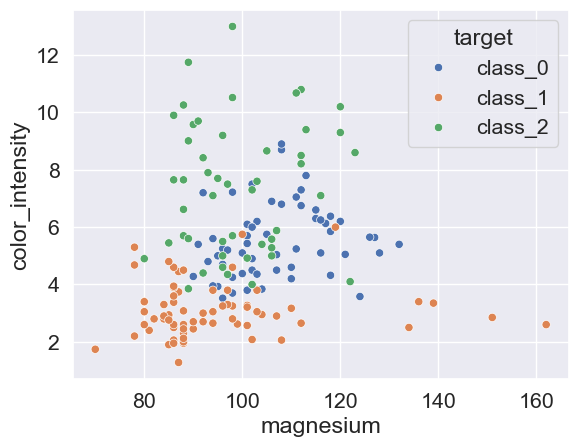

In [232]:
sns.scatterplot(data = df_vin_copy,x='magnesium', y='color_intensity',hue = 'target')

In [233]:
X = df_vin.drop(['target'],axis=1)
y = data_vin['target']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, 
                                                    random_state = 100)


In [235]:
X_train.shape

(133, 13)

In [236]:
X_test.shape

(45, 13)

In [237]:
model = SVC()

In [238]:
model.fit(X_train, y_train)

SVC()

In [239]:
predictions = model.predict(X_test)

In [240]:
model.score(X_train, y_train)

0.7293233082706767

#### Score du modèle sans amélioration sur les données de Test :

In [241]:
model.score(X_test, y_test)

0.5333333333333333

***


In [242]:
print(confusion_matrix(y_test, predictions))

[[ 9  0  1]
 [ 2 14  1]
 [ 1 16  1]]


In [243]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.47      0.82      0.60        17
           2       0.33      0.06      0.10        18

    accuracy                           0.53        45
   macro avg       0.52      0.59      0.50        45
weighted avg       0.48      0.53      0.44        45



In [244]:
grid_param = {'C': [0.1,1,5,10,15,20,30,40,50,100,1000,10000,100000],
             'gamma': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

En SVM, le paramètre <font color='red'><b>gamma</b></font> contrôle l'influence de chaque exemple d'entraînement sur la décision de la frontière de décision. Une valeur plus élevée de gamma signifie que les exemples d'entraînement ont une influence plus forte, ce qui conduit à une frontière de décision plus complexe et plus flexible. Une valeur plus faible de gamma signifie que les exemples d'entraînement ont une influence plus faible, ce qui conduit à une frontière de décision plus lisse et moins complexe.

L'intervalle choisi pour faire varier le paramètre gamma dépend souvent du domaine d'application et de la nature des données. Cependant, il est courant de choisir un intervalle logarithmique de valeurs positives pour gamma, car le comportement de l'algorithme SVM peut varier considérablement en fonction de la valeur de gamma. Voici quelques considérations générales pour choisir l'intervalle pour faire varier gamma :

<font color='lightgreen'>Échelle logarithmique :</font> Comme mentionné précédemment, il est courant de choisir un intervalle logarithmique pour gamma. Cela signifie que les valeurs de gamma augmentent de manière exponentielle à mesure que vous vous déplacez le long de l'intervalle. Cela permet d'explorer une large gamme de valeurs de gamma, en accordant une attention particulière aux valeurs plus petites qui peuvent conduire à une régularisation plus faible et à des frontières de décision plus lisses.

In [245]:
grid = GridSearchCV(SVC(), grid_param, verbose = 10,cv=5)

In [246]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 104 candidates, totalling 520 fits
[CV 1/5; 1/104] START C=0.1, gamma=1e-07........................................
[CV 1/5; 1/104] END .........C=0.1, gamma=1e-07;, score=0.407 total time=   0.0s
[CV 2/5; 1/104] START C=0.1, gamma=1e-07........................................
[CV 2/5; 1/104] END .........C=0.1, gamma=1e-07;, score=0.407 total time=   0.0s
[CV 3/5; 1/104] START C=0.1, gamma=1e-07........................................
[CV 3/5; 1/104] END .........C=0.1, gamma=1e-07;, score=0.407 total time=   0.0s
[CV 4/5; 1/104] START C=0.1, gamma=1e-07........................................
[CV 4/5; 1/104] END .........C=0.1, gamma=1e-07;, score=0.385 total time=   0.0s
[CV 5/5; 1/104] START C=0.1, gamma=1e-07........................................
[CV 5/5; 1/104] END .........C=0.1, gamma=1e-07;, score=0.423 total time=   0.0s
[CV 1/5; 2/104] START C=0.1, gamma=1e-06........................................
[CV 1/5; 2/104] END .........C=0.1, gamma=1e-0

[CV 4/5; 40/104] END .............C=15, gamma=1;, score=0.385 total time=   0.0s
[CV 5/5; 40/104] START C=15, gamma=1............................................
[CV 5/5; 40/104] END .............C=15, gamma=1;, score=0.423 total time=   0.0s
[CV 1/5; 41/104] START C=20, gamma=1e-07........................................
[CV 1/5; 41/104] END .........C=20, gamma=1e-07;, score=0.667 total time=   0.0s
[CV 2/5; 41/104] START C=20, gamma=1e-07........................................
[CV 2/5; 41/104] END .........C=20, gamma=1e-07;, score=0.667 total time=   0.0s
[CV 3/5; 41/104] START C=20, gamma=1e-07........................................
[CV 3/5; 41/104] END .........C=20, gamma=1e-07;, score=0.741 total time=   0.0s
[CV 4/5; 41/104] START C=20, gamma=1e-07........................................
[CV 4/5; 41/104] END .........C=20, gamma=1e-07;, score=0.769 total time=   0.0s
[CV 5/5; 41/104] START C=20, gamma=1e-07........................................
[CV 5/5; 41/104] END .......

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 15, 20, 30, 40, 50, 100, 1000,
                               10000, 100000],
                         'gamma': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1]},
             verbose=10)

In [247]:
grid.best_params_

{'C': 100000, 'gamma': 1e-06}

In [248]:
grid.best_score_

0.9552706552706554

In [249]:
grid_model = grid.best_estimator_

In [250]:
grid_predictions = grid_model.predict(X_test)

In [251]:
grid_model.score(X_test,y_test)

0.9111111111111111

In [252]:
conf_mtx = confusion_matrix(y_test, grid_predictions)
conf_mtx

array([[10,  0,  0],
       [ 1, 15,  1],
       [ 0,  2, 16]], dtype=int64)

In [253]:
classes = df_vin_copy['target'].unique()
classes

array(['class_0', 'class_1', 'class_2'], dtype=object)

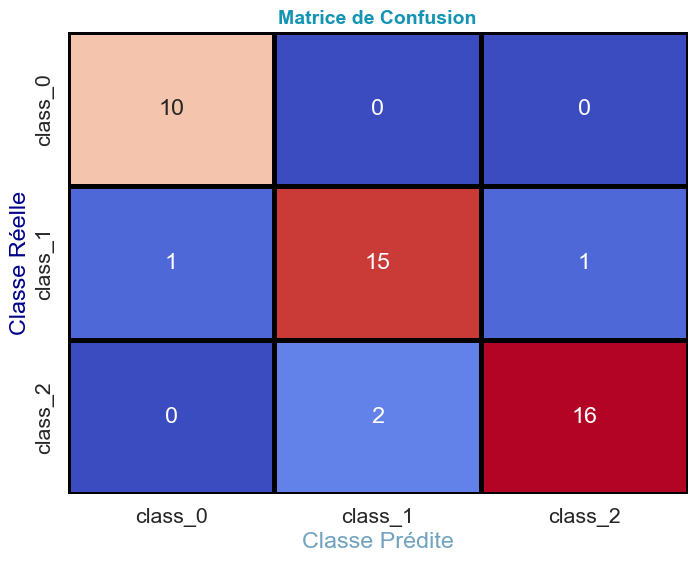

In [254]:
# Création du heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4) # Ajuste la taille de la police d'écriture.
sns.heatmap(conf_mtx, annot=True, cmap='coolwarm', xticklabels=classes, yticklabels=classes, cbar=False, linewidths=2.5, linecolor= 'black')# fmt='d' = formatage des annot en 'entier' //  cbar=True = affichage de la bare de couleur
plt.xlabel('Classe Prédite' , color = '#71a3c0')
plt.ylabel('Classe Réelle', color = 'darkblue')
plt.title('Matrice de Confusion',fontsize=14, fontweight='bold', color='#1394b2')
plt.show()

In [255]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.88      0.88      0.88        17
           2       0.94      0.89      0.91        18

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



Voici ce que fournit chaque métrique dans le rapport de classification :

* Précision (Precision) : La précision est la proportion de vrais positifs parmi tous les exemples prédits positifs. Elle mesure la capacité du modèle à ne pas classer à tort un exemple négatif comme positif.

* Rappel (Recall) : Le rappel est la proportion de vrais positifs parmi tous les exemples réellement positifs. Il mesure la capacité du modèle à identifier correctement les exemples positifs.

* Score F1 (F1 Score) : Le score F1 est la moyenne pondérée de la précision et du rappel. Il fournit une mesure de la précision globale du modèle en tenant compte à la fois des faux positifs et des faux négatifs.

* Support : Le support est le nombre d'exemples de chaque classe dans l'ensemble de test.

### Visualisation du rapport :

{'0': {'f1-score': 0.9523809523809523,
       'precision': 0.9090909090909091,
       'recall': 1.0,
       'support': 10.0},
 '1': {'f1-score': 0.8823529411764706,
       'precision': 0.8823529411764706,
       'recall': 0.8823529411764706,
       'support': 17.0},
 '2': {'f1-score': 0.9142857142857143,
       'precision': 0.9411764705882353,
       'recall': 0.8888888888888888,
       'support': 18.0},
 'accuracy': 0.9111111111111111,
 'macro avg': {'f1-score': 0.9163398692810457,
               'precision': 0.9108734402852049,
               'recall': 0.9237472766884531,
               'support': 45.0},
 'weighted avg': {'f1-score': 0.9106878306878307,
                  'precision': 0.9118241235888295,
                  'recall': 0.9111111111111111,
                  'support': 45.0}}
              precision    recall  f1-score    support
0              0.909091  1.000000  0.952381  10.000000
1              0.882353  0.882353  0.882353  17.000000
2              0.941176  0.888889  0

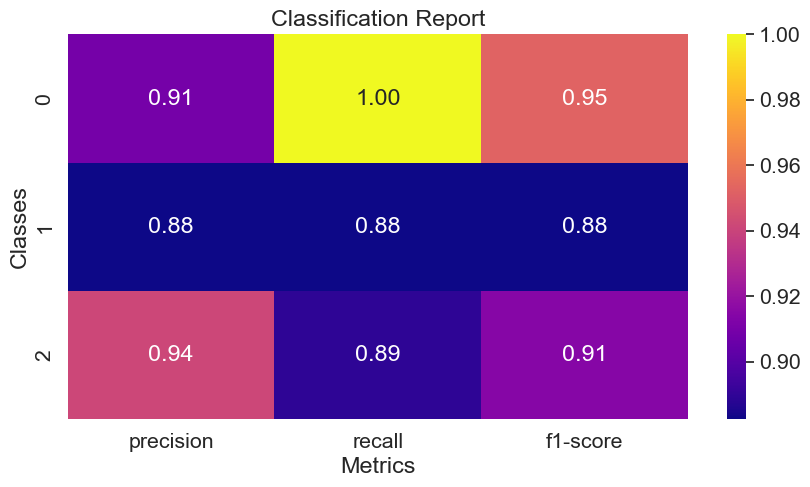

In [256]:
# Créer un rapport de classification
report = classification_report(y_test, grid_predictions, output_dict=True)
pprint(report)
# Convertir le rapport en DataFrame
df_report = pd.DataFrame(report).transpose()
print(df_report)

# Supprimer la colonne 'support' car elle n'est pas nécessaire pour la représentation graphique
df_report.drop(columns=['support'], inplace=True)

# Tracer un heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_report.head(3), annot=True, fmt=".2f", cmap="plasma")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()